# 2022-01-03 Fixing two oVAl bugs and resolving an awkward combination of assumptions for oVAa

Results below are for commit: ### (Rerunning the code below for other commits is not likely/guaranteed to give the same results.)

Based on the notes from yesterday (2022-01-02b) I have now:
* Fixed the bug in the looming value calculations (`sc_scenario_helper.get_access_order_values()`), which gave non-zero looming values also when $\dot{\theta} < \dot{\theta}_0$ (and also during periods without an apparent collision course, because I implemented this by setting $\dot{\theta}$ = 0).
* Also fixed another bug that I discovered in the same looming value calculations, whereby a decelerating other agent could be anticipated to reverse in the future.
* Fixed the awkward assumption combination for the `oVAaoBE*` models, by now considering ego-accelerations for acceleration-controlling but not speed-controlling ego agents, when generating other-behaviour hypotheses in these models.

Below rerunning some of the `oVAaoVAloBEvoAI` simulations from yesterday, to see the effects.

In conclusion, this looks pretty promising for another round of large-scale deterministic fits soon. I don't think the previously mentioned imperfection in the looming value calculations (only considering looming up until when free speed has been regained) needs to be addressed. While doing these changes I also looked at anticipated looming time histories from the perspective of the other agent (e.g., the pedestrian's perspective, in the short-stopping simulations below), and in the cases I looked at, the apparent collision courses, and hence the perceived looming, all occurred within the currently considered integration time window. So this imperfection seems possibly quite inconsequential in the end. Looking back now in more detail at the calculations in `sc_scenario_helper.get_access_order_values()` I realise that I always include a "regain free speed" time interval there, even if the "access-achieving" acceleration already takes the agent to this speed (in which case that interval will be just an interval of constant speed); this should further reduce any impact of this imperfection.

Next steps:
* Extend the search range for $\dot{\theta}_1$ downward, and probably also set $\dot{\theta}_0$ = 0.
* Run a small or medium grid set of deterministic fits, just to check that everything seems in order.
* Run large-scale determinstic fits on ARC4.

## Init

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
parent_path = str(Path('.').absolute().parent)
if not (parent_path in sys.path):
    sys.path.append(parent_path)
    sys.path.append(parent_path + '/SCPaper')
print(sys.path)

import sc_fitting

def run(i_variation = 0, snapshots=(None, None), detailed_snapshots=False, plot_veh_stop_dec=False, end_time=12):
    scenario.end_time = end_time
    sim = sc_fitting.construct_model_and_simulate_scenario(model, params_dict, scenario,
                                                           i_variation=i_variation, 
                                                           apply_stop_criteria=False,
                                                           snapshots=snapshots,
                                                           detailed_snapshots=detailed_snapshots,
                                                           report_time=True)
    sim.do_plots(kinem_states=True, beh_probs=('oBE' in model), beh_activs=False, 
                  action_val_ests=False, surplus_action_vals=False, looming=False,
                  veh_stop_dec=plot_veh_stop_dec)
    metrics = sc_fitting.get_metrics_for_scenario(scenario, sim, verbose=True)
    if plot_veh_stop_dec:
        veh_agent = sim.agents[sc_fitting.i_VEH_AGENT]
        print(f'Final vehicle distance to conflict space: {veh_agent.signed_CP_dists[-1] - veh_agent.coll_dist} m')


['C:\\GITHUB\\COMMOTIONSFramework\\diary notebooks', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\python39.zip', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\DLLs', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64', '', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\win32\\lib', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\Pythonwin', 'C:\\WinPython\\WPy64-3920\\python-3.9.2.amd64\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\tragma\\.ipython', 'C:\\GITHUB\\COMMOTIONSFramework', 'C:\\GITHUB\\COMMOTIONSFramework/SCPaper']


## Short-stopping

The "second phase" that happened in the simulations yesterday is now no longer there, thanks to having resolved the "assumption awkwardness" mentioned above. We now see clear short-stopping behaviour from this model, especially if increasing $\beta_V$ (or decreasing $\dot{\theta}_1$; not shown here). 


Model parameters: {'T_delta': 10.0, 'thetaDot_1': 0.005, 'beta_V': 1}


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


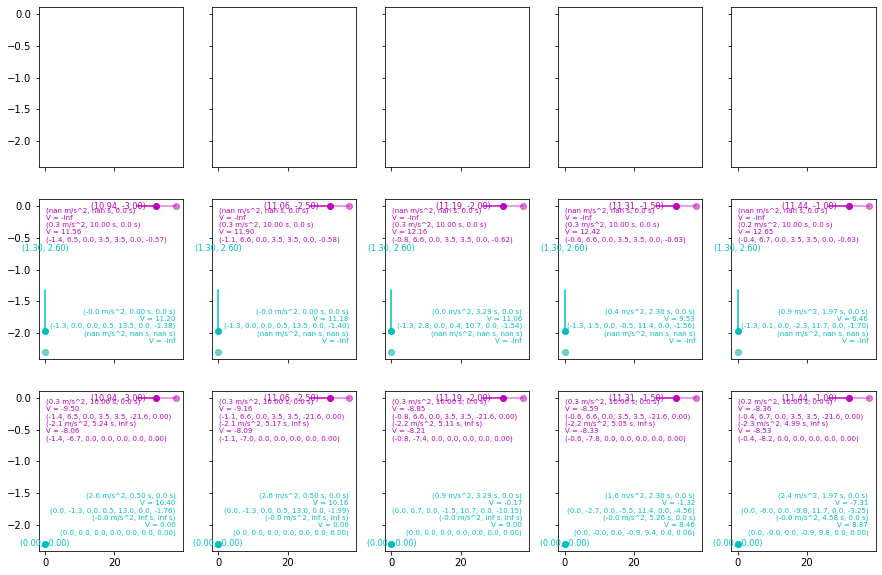

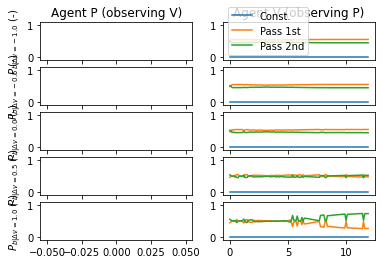

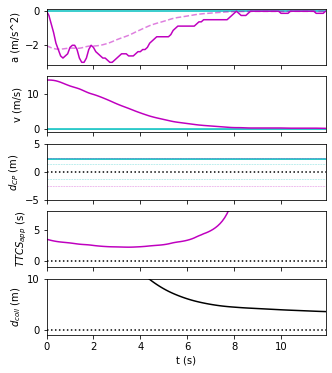

Metric VehShortStop_veh_av_surpl_dec = 0.3075560624315857
Final vehicle distance to conflict space: 2.540833333333315 m

Model parameters: {'T_delta': 10.0, 'thetaDot_1': 0.005, 'beta_V': 10}


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


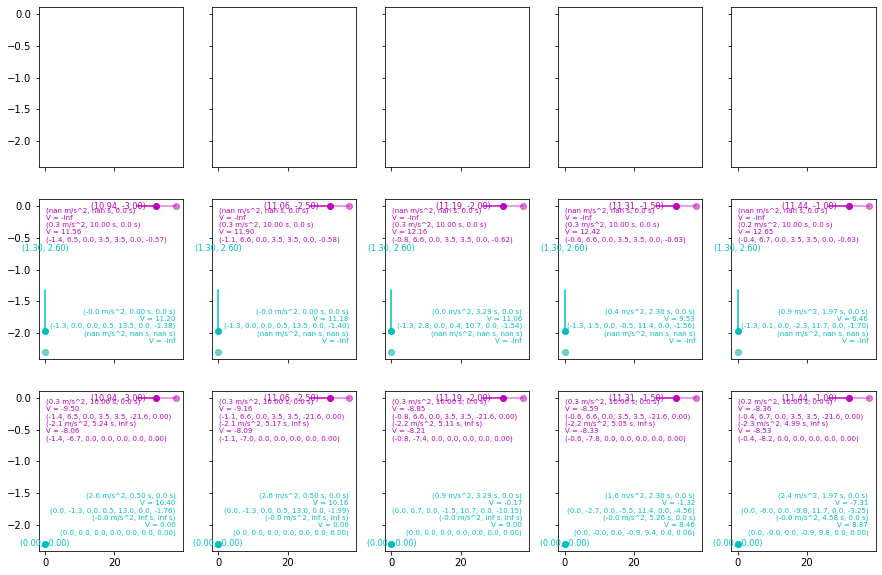

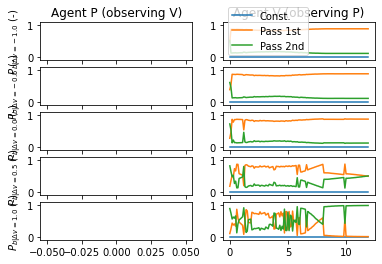

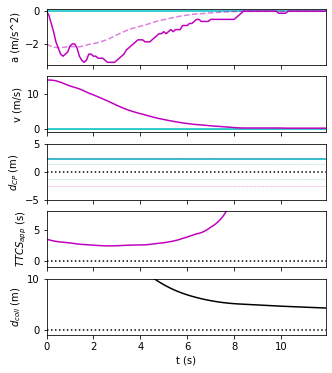

Metric VehShortStop_veh_av_surpl_dec = 0.44830092028843377
Final vehicle distance to conflict space: 3.238333333333296 m


In [8]:
model = 'oVAaoVAloBEvoAI'
scenario = sc_fitting.ONE_AG_SCENARIOS['VehShortStop']
for beta_V in (1, 10):
    params_dict = {'T_delta': 10.0, 'thetaDot_1': 0.005, 'beta_V': beta_V}
    print(f'\nModel parameters: {params_dict}')
    run(snapshots=(None, (1,)), plot_veh_stop_dec=True)

## Prio assertion

Relatively similar behaviour to yesterday's simulations. The main thing to note here is that the looming values for the pedestrian-passing-second behaviour are now all zero, as they should be, thanks to having fixed that bug.

Model parameterisation: {'T_delta': 10.0, 'thetaDot_1': 0.005, 'beta_V': 1.0}

	Scenario variation #1/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


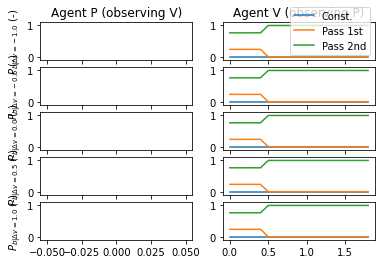

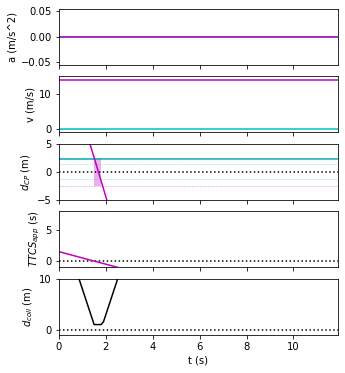

Metric VehPrioAssert_veh_av_speed = 13.88888888888889

	Scenario variation #2/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


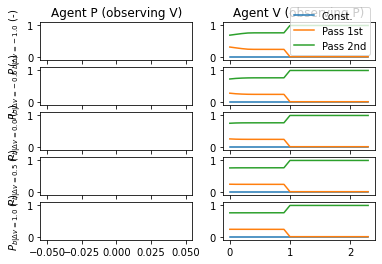

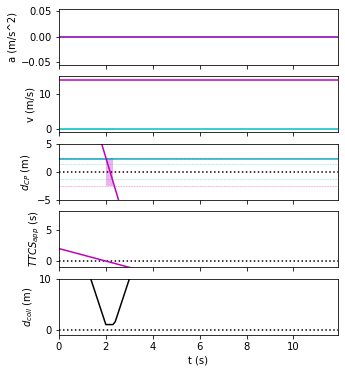

Metric VehPrioAssert_veh_av_speed = 13.88888888888889

	Scenario variation #3/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:

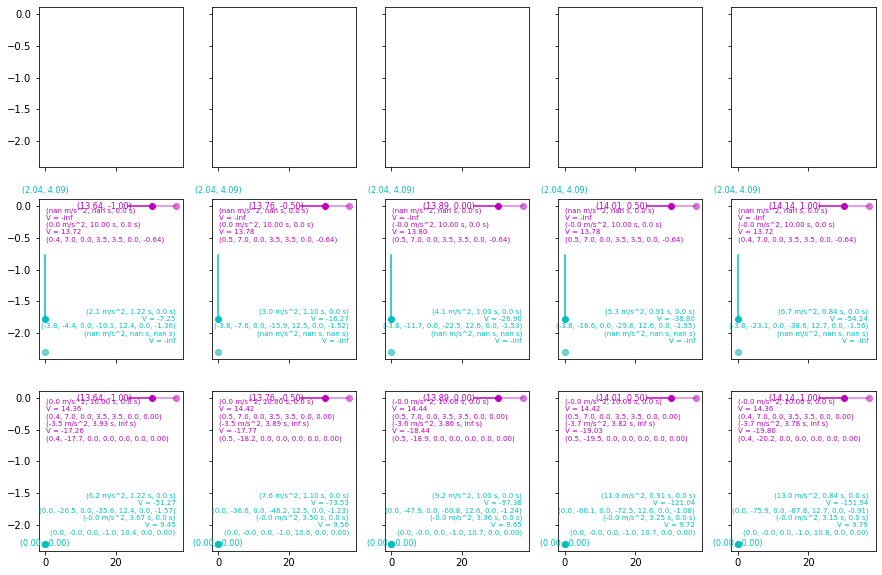

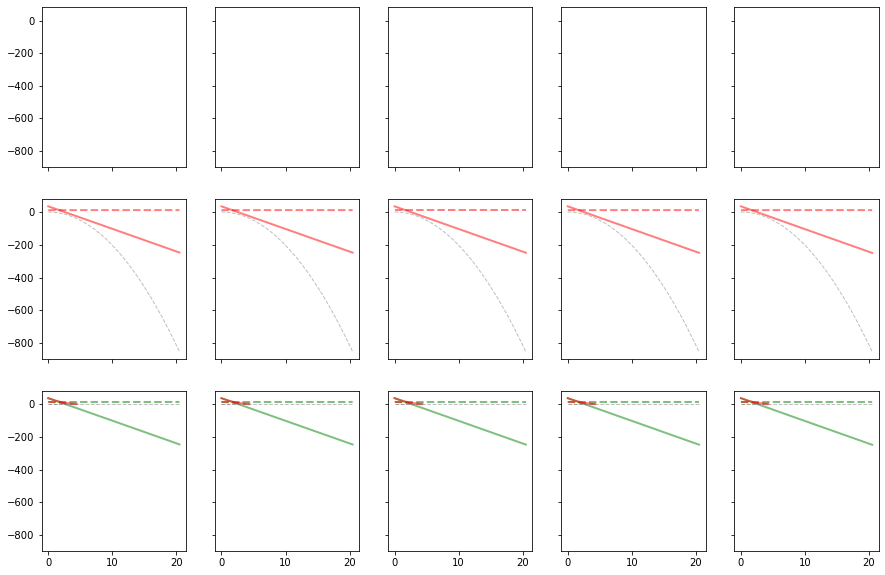

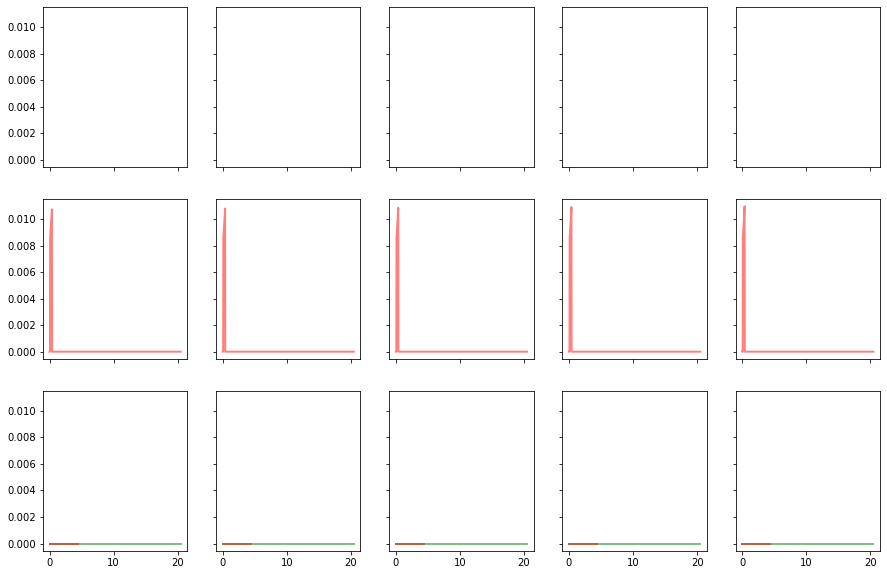

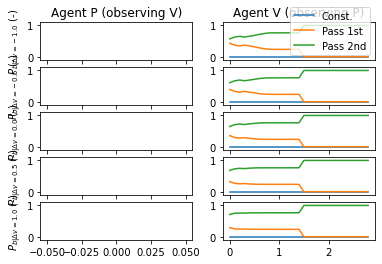

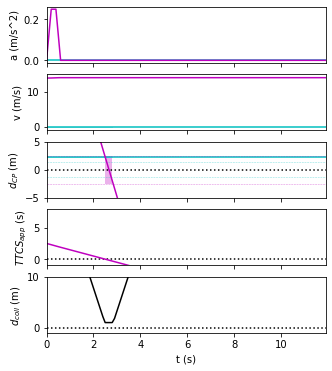

Metric VehPrioAssert_veh_av_speed = 13.958119658119655
Model parameterisation: {'T_delta': 10.0, 'thetaDot_1': 0.0015, 'beta_V': 1.0}

	Scenario variation #1/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


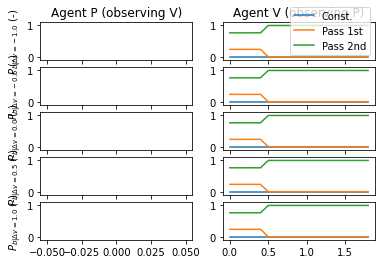

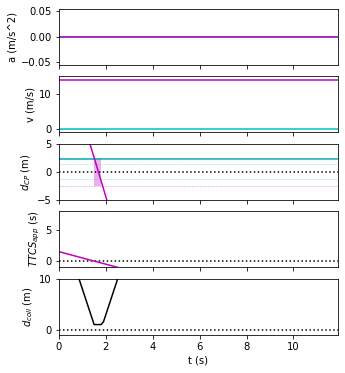

Metric VehPrioAssert_veh_av_speed = 13.88888888888889

	Scenario variation #2/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds


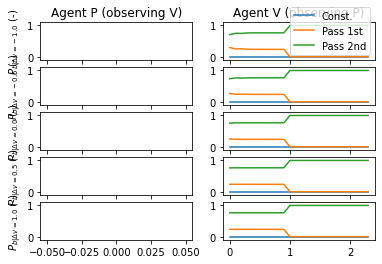

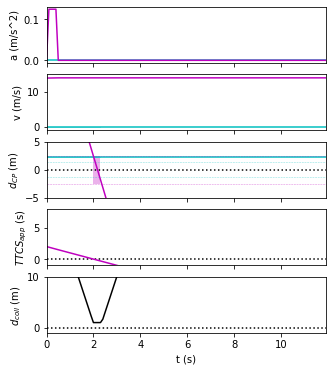

Metric VehPrioAssert_veh_av_speed = 13.921388888888888

	Scenario variation #3/3:


C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:236: RuntimeWarning: divide by zero encountered in true_divide
  side_app_arr_times = side_dists / speeds
C:\GITHUB\COMMOTIONSFramework\sc_scenario_helper.py:

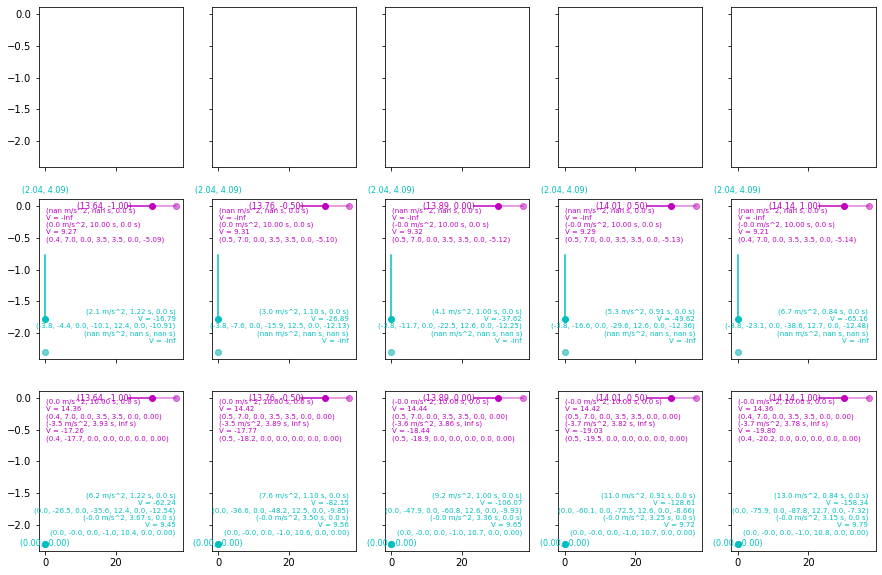

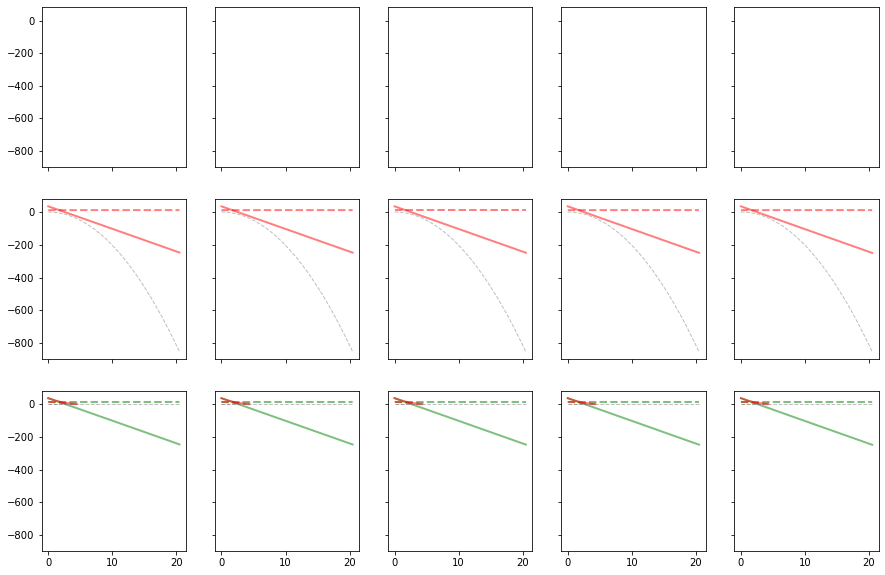

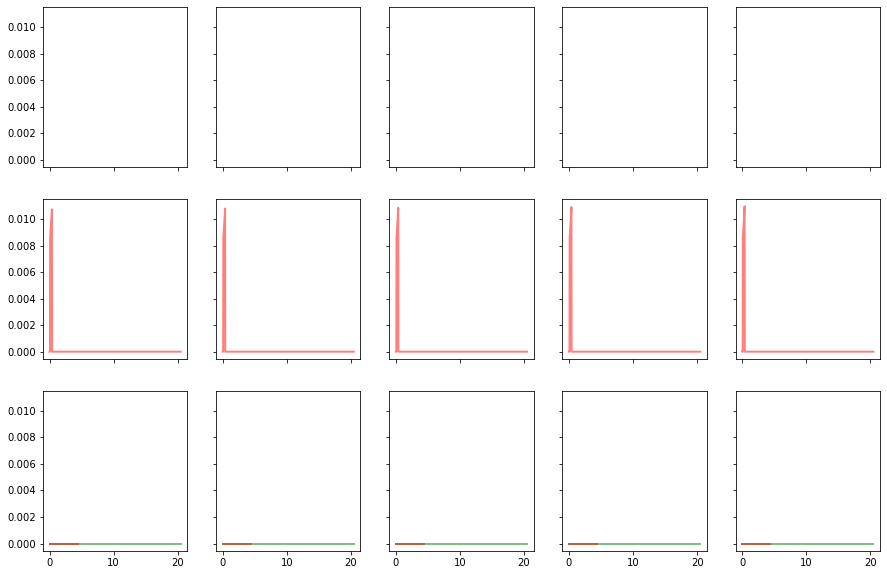

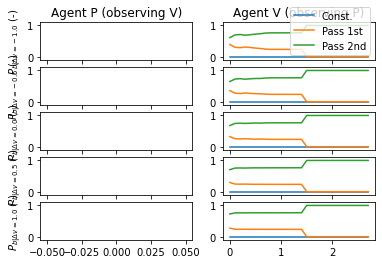

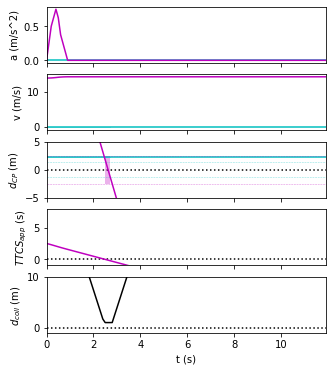

Metric VehPrioAssert_veh_av_speed = 14.102350427350425


In [2]:
model = 'oVAaoVAloBEvoAI'
scenario = sc_fitting.ONE_AG_SCENARIOS['VehPrioAssert']
for thetaDot_1 in (0.005, 0.0015):
    params_dict = {'T_delta': 10.0, 'thetaDot_1': thetaDot_1, 'beta_V': 1.0}
    print(f'Model parameterisation: {params_dict}')
    for i_variation in range(scenario.n_variations):
        print(f'\n\tScenario variation #{i_variation+1}/{scenario.n_variations}:')
        if i_variation == 2:
            snapshots = (None, (0,))
        else:
            snapshots = (None, None)
        run(i_variation=i_variation, snapshots=snapshots, detailed_snapshots=True)